<a href="https://colab.research.google.com/github/Gauravkumarlokhande/Gauravkumarlokhande/blob/main/Synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Synthetic Data**

Synthetic data is artificial data that is created by using different algorithms that mirror the statistical properties of the original data but does not reveal any information regarding real people.

Generating according to distribution.

For cases where real data does not exist but data analyst has a comprehensive understanding of how dataset distribution would look like, the analyst can generate a random sample of any distribution such as Normal, Exponential, Chi-square, t, lognormal and Uniform. In this technique, the utility of synthetic data varies depending on the analyst’s degree of knowledge about a specific data environment.

**Scikit**-learn is one of the most widely-used Python libraries for machine learning tasks and it can also be used to generate synthetic data. One can generate data that can be used for regression, classification, or clustering tasks.

**SymPy** is another library that helps users to generate synthetic data. Users can specify the symbolic expressions for the data they want to create, which helps users to create synthetic data according to their needs.

**Pydbgen**: Categorical data can also be generated using Python’s Pydbgen library. Users can generate random names, international phone numbers, email addresses etc. easily using the library.

**Copulas** is a Python library for modeling multivariate distributions and sampling from them using copula functions. Given a table containing numerical data, we can use Copulas to learn the distribution and later on generate new synthetic rows following the same statistical properties.



# **Supported Distributions**
**Univariate**

Beta

Gamma

Gaussian

Gaussian KDE

Log-Laplace

Student T

Truncated Gaussian

Uniform

**Archimedean Copulas (Bivariate)**

Clayton

Frank

Gumbel

**Multivariate
Gaussian Copula**

D-Vine

C-Vine

R-Vine

In [2]:
import numpy as np
import pandas as pd

At first, tried using fitter library.

fitter package provides a simple class to identify the distribution from which a data samples is generated from. It uses 80 distributions from Scipy and allows you to plot the results to check what is the most probable distribution and the best parameters.

After finding the best distribution and it's best parameters for each variable, i drew random samples according to the fitted distributions for each variable. But this didn't gave much precise results.
The distribution of real data and synthetic data didn't match for all all the variables. Hence this technique of synthetic data generation is not much good. Generating synthetic data by creating random samples is a basic idea.

In [7]:
!pip install fitter

     |████████████████████████████████| 47 kB 4.1 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=194f85ca5f0a054cd0e1b69e3fa451c0d86b6ad52bcef4d3b72222ff692b9d85
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=8f2fe3d1107342d7da5a4e8e0e4833f2b855d6868ab438c9d33bad85912e6166
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv('/content/drive/MyDrive/Red Wine Quality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Distribution plots for real data**

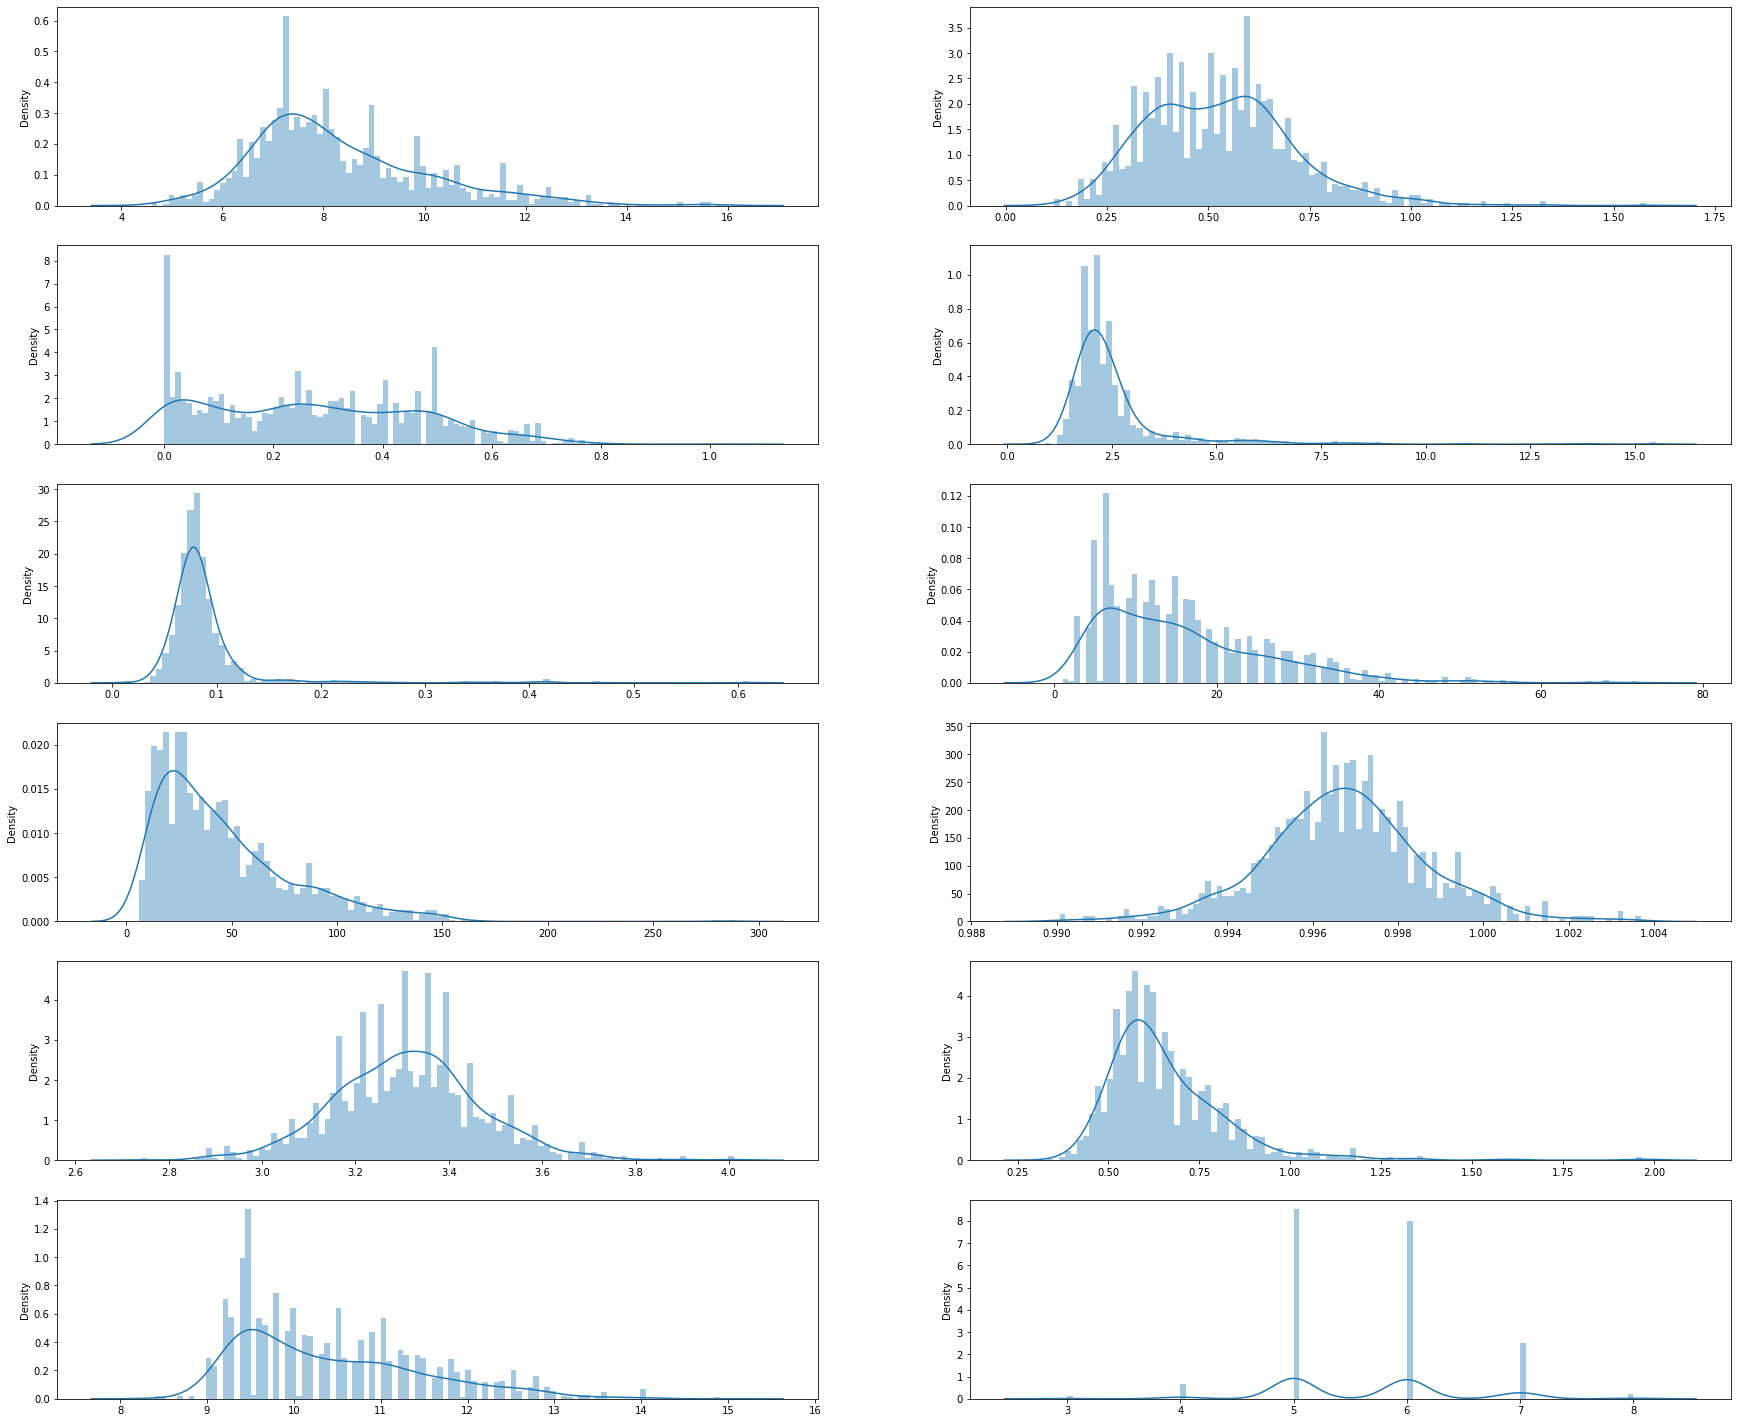

In [11]:
plt.figure(figsize=(30,30))
for i in enumerate(data.columns):
  plt.subplot(7,2,i[0]+1)
  sns.distplot(x=data[i[1]], bins = 100)

In [37]:
!pip install fitter # installation of the library

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions 
# get_common_distributions and get_distributions contains a set of distributions used for fitting
from scipy import stats

summary for fixed acidity
None
          sumsquare_error         aic           bic  kl_div
lognorm          0.293004  677.819194 -13736.785661     inf
gamma            0.308630  686.692228 -13653.707510     inf
chi2             0.308630  686.692133 -13653.706917     inf
cauchy           0.366599  679.525150 -13385.856289     inf
rayleigh         0.408043  648.709705 -13214.599534     inf
{'lognorm': {'s': 0.31551872302296036, 'loc': 2.9704000150155236, 'scale': 5.0884653878397925}}
*************************************************************************
summary for volatile acidity
None
          sumsquare_error         aic          bic  kl_div
gamma           17.456603  443.094861 -7201.216362     inf
chi2            17.456606  443.095053 -7201.216123     inf
lognorm         17.622144  427.044938 -7186.124532     inf
norm            17.736556  721.978757 -7183.153658     inf
rayleigh        21.281605  378.895378 -6891.791419     inf
{'gamma': {'a': 10.348398340271142, 'loc': -0.04804

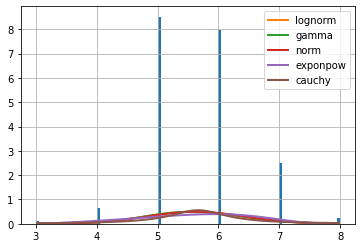

In [14]:
for i in data.columns:
  f = Fitter(data[i],distributions= get_common_distributions())
  print('summary for {}'.format(i))
  print(f.fit())
  print(f.summary())
  print(f.get_best(method = 'sumsquare_error'))
  print('*************************************************************************')


**Generate random samples for each variable according to the fitted best distribution and parameters above**

For fixed acidity

In [15]:
rsfi=np.random.lognormal(mean=2.9704000150155236,sigma=5.0884653878397925,size=20)

for volatile acidity

In [16]:
rsvo=np.random.gamma(shape=10.348398340271142,scale=0.05564817762062061,size=20)

citric acid

In [17]:
from scipy.stats import exponpow
rscr = exponpow.rvs(b=0.772824945300072, size=20)


residual sugar

In [18]:
rsr= stats.cauchy.rvs(loc=2.1283058342663557, scale=0.30789228983514483,size=20)


chlorides

In [19]:
rsc=stats.cauchy.rvs(loc=0.07831637869244443, scale=0.00924483793182298,size=20)


free sulpher dioxide

In [20]:
rsf=np.random.gamma(shape=2.0936111979914287,scale=7.169315823294623,size=20)

total sulfur dioxide

In [21]:
rst=np.random.gamma(shape=1.5305039251277879,scale=26.523933254771467,size=20)

Density

In [22]:
rsd=np.random.gamma(shape=1091.4142843632117,scale=5.712816708443015e-05,size=20)

pH

In [23]:
rsph=np.random.lognormal(mean=-0.08873595380233784, sigma=3.396354862144002, size=20)
rsph

array([3.14177929e+01, 4.31386566e-01, 4.11408388e-02, 6.40000850e+00,
       1.59920464e+00, 8.62734351e-01, 2.52964480e-01, 5.66534171e-02,
       1.46442050e-01, 2.62332827e+00, 1.05201540e+00, 9.10725202e+00,
       5.64098583e-02, 3.78232705e-01, 8.34417861e-01, 4.05556385e+00,
       1.11373415e+01, 8.64498445e-01, 2.12893370e-02, 2.75528268e+00])

sulphates

In [24]:
rss=np.random.lognormal(mean=0.283967294996058,sigma=0.34450669633240716,size=20)
rss

array([1.23809679, 1.09845104, 0.93928448, 2.43027778, 1.19510097,
       1.99880362, 1.42830923, 1.41357207, 1.29741288, 0.7560489 ,
       1.12035944, 1.45319982, 1.3095226 , 1.95277933, 1.06529996,
       1.32099018, 2.30911437, 0.68323764, 1.14643864, 1.14413142])

alcohol

In [25]:
rsal=np.random.lognormal(mean=8.121579871759721, sigma=2.0735496300243694,size=20)

quality

In [26]:
rsq=np.random.lognormal(mean=-8.036963731374712, sigma=13.64923914700606,size=20)

**Create a new data frame for these randomly sampled variable values**

In [27]:
df1=pd.DataFrame({'fixed acidity':rsfi,'volatile acidity':rsvo,'citric acid':rscr,'residual sugar':rsr,'chlorides':rsc,
                  'free sulfur dioxide':rsf,'total sulfur dioxide':rst,'density':rsd,'pH':rsph,'sulphates':rss,
                 'alcohol':rsal,'quality':rsq})

In [38]:
new_df=data.append(df1) #append this newly created data frame to the original data 

summary for fixed acidity
None
          sumsquare_error           aic           bic  kl_div
rayleigh     6.336094e-08  57891.915153 -38782.908148     inf
chi2         6.730033e-08   3752.724254 -38677.864475     inf
exponpow     7.347481e-08   2945.920507 -38535.752601     inf
norm         7.396826e-08  55840.202197 -38532.305389     inf
powerlaw     7.980107e-08   2844.106398 -38402.032518     inf
{'rayleigh': {'loc': -7838.450161285277, 'scale': 7953.357425357137}}
*************************************************************************
summary for volatile acidity
None
          sumsquare_error         aic          bic  kl_div
gamma           17.210503  442.483702 -7334.638704     inf
chi2            17.210506  442.484009 -7334.638482     inf
lognorm         17.370273  426.490000 -7319.678421     inf
norm            17.499251  719.966704 -7315.090939     inf
rayleigh        21.110948  377.504792 -7011.312066     inf
{'gamma': {'a': 10.386763326358793, 'loc': -0.04861665063104595, 

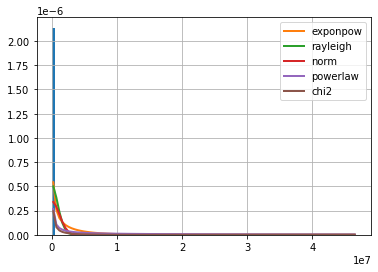

In [29]:
for i in new_df.columns:                                         #again fit the distributions for this finally generated data frame
  f = Fitter(new_df[i],distributions= get_common_distributions())
  print('summary for {}'.format(i))
  print(f.fit())
  print(f.summary())
  print(f.get_best(method = 'sumsquare_error'))
  print('*************************************************************************')


**Again plot the distribution plots to verify the result**

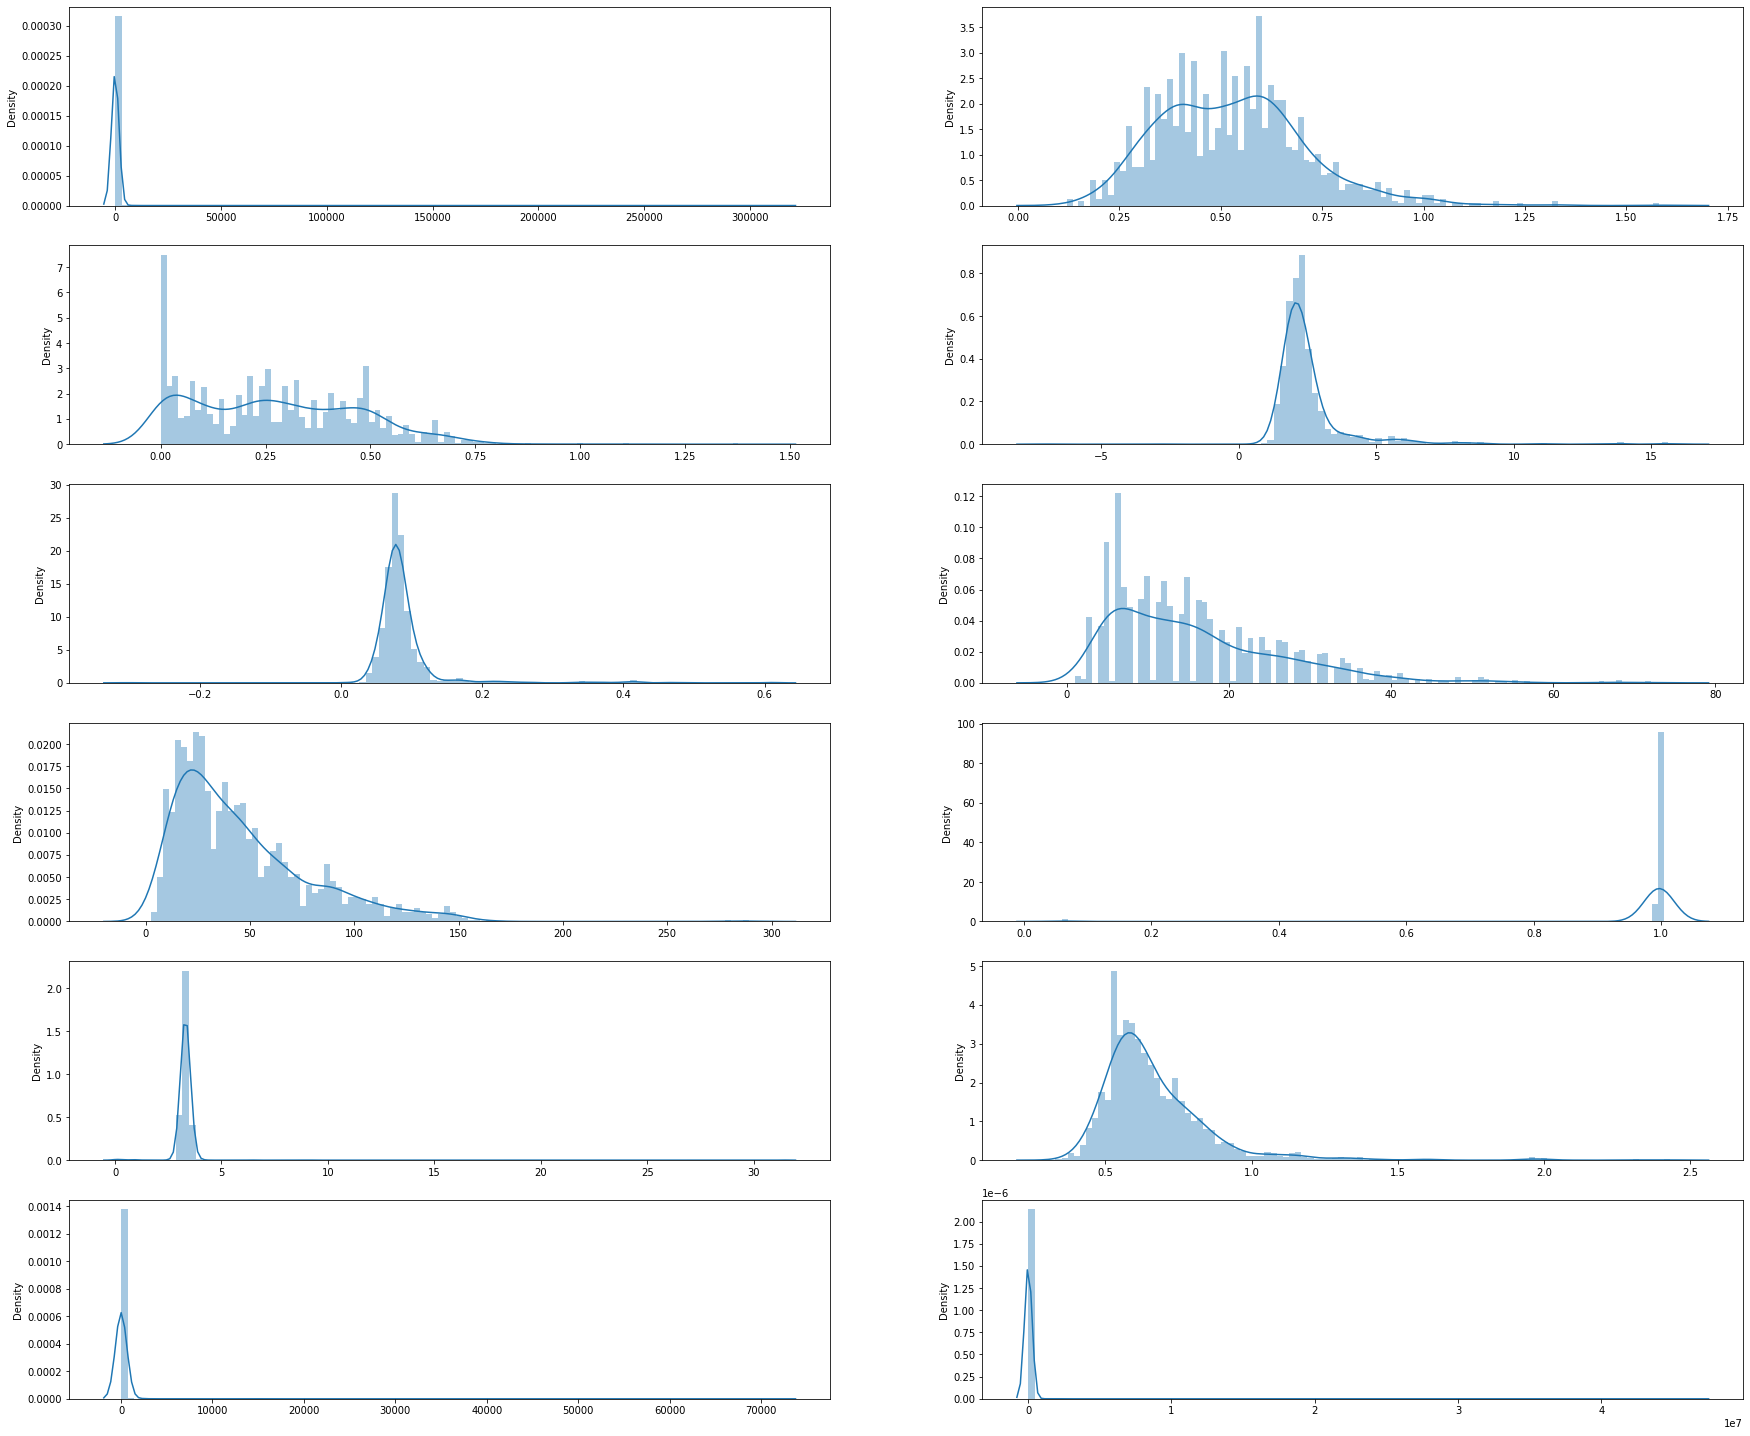

In [39]:
plt.figure(figsize=(30,30))
for i in enumerate(new_df.columns):
  plt.subplot(7,2,i[0]+1)
  sns.distplot(x=new_df[i[1]], bins = 100)

According to the above distribution plot not all variables follow the distribution they followed earlier in the real data.
So to avoid this and get more precise results another library **Copulas** is used.

# **Genarating synthetic data by using Copulas**

In [31]:
!pip install copulas

     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 11.2 MB 40.7 MB/s 
     |████████████████████████████████| 900 kB 53.9 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [32]:
from copulas.multivariate import GaussianMultivariate  # importing the library

dist = GaussianMultivariate() 
dist.fit(data)  #fitting the data

In [35]:
sampled = dist.sample(1600)  # creating synthetic data of 1600 observations for each variable

**Plot the distribution plot for newly generated data **

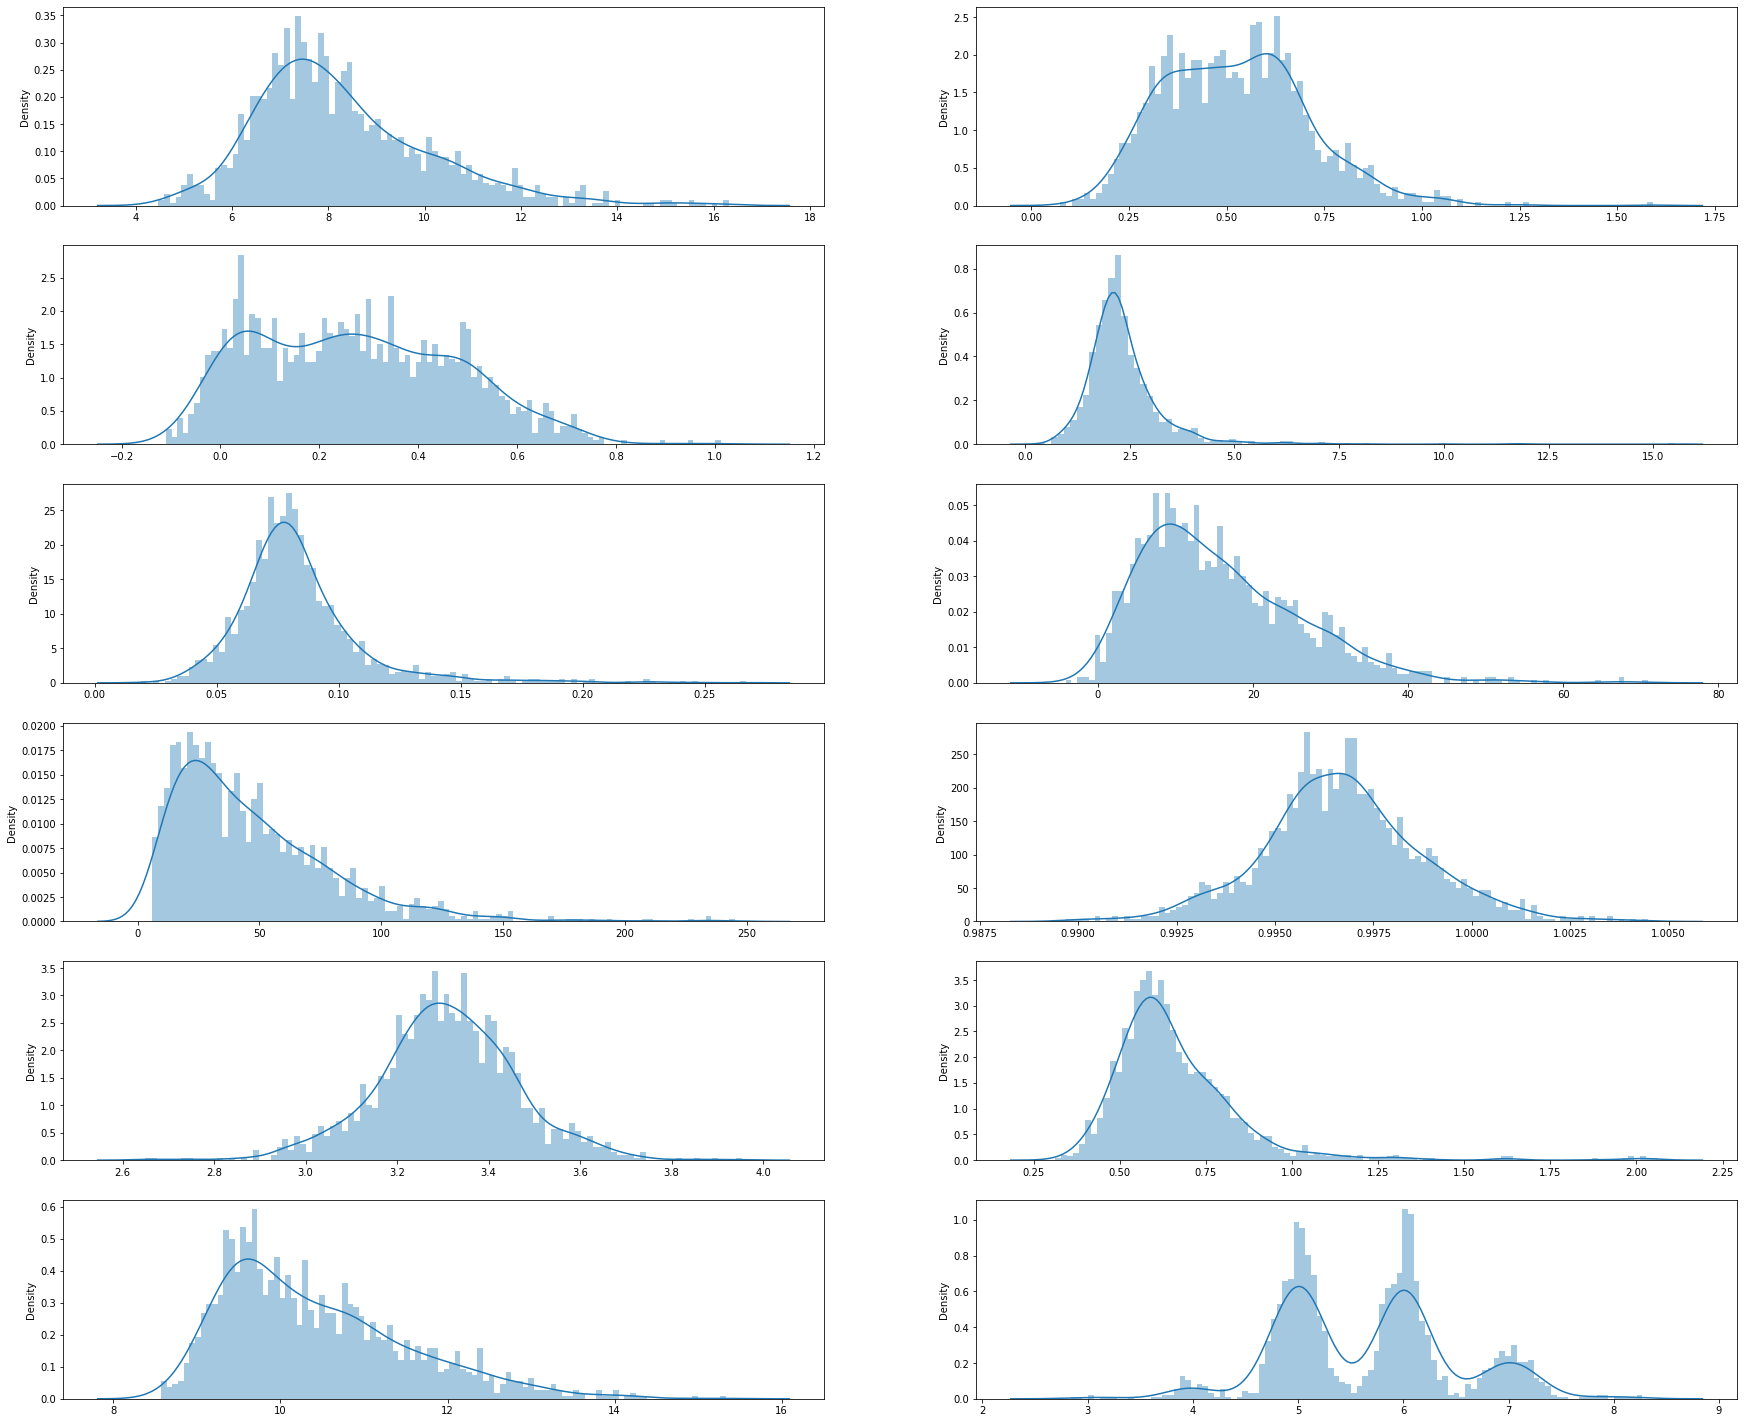

In [36]:
plt.figure(figsize=(30,30))
for i in enumerate(sampled.columns):
  plt.subplot(7,2,i[0]+1)
  sns.distplot(x=sampled[i[1]], bins = 100)

**Below is the plot for original data**

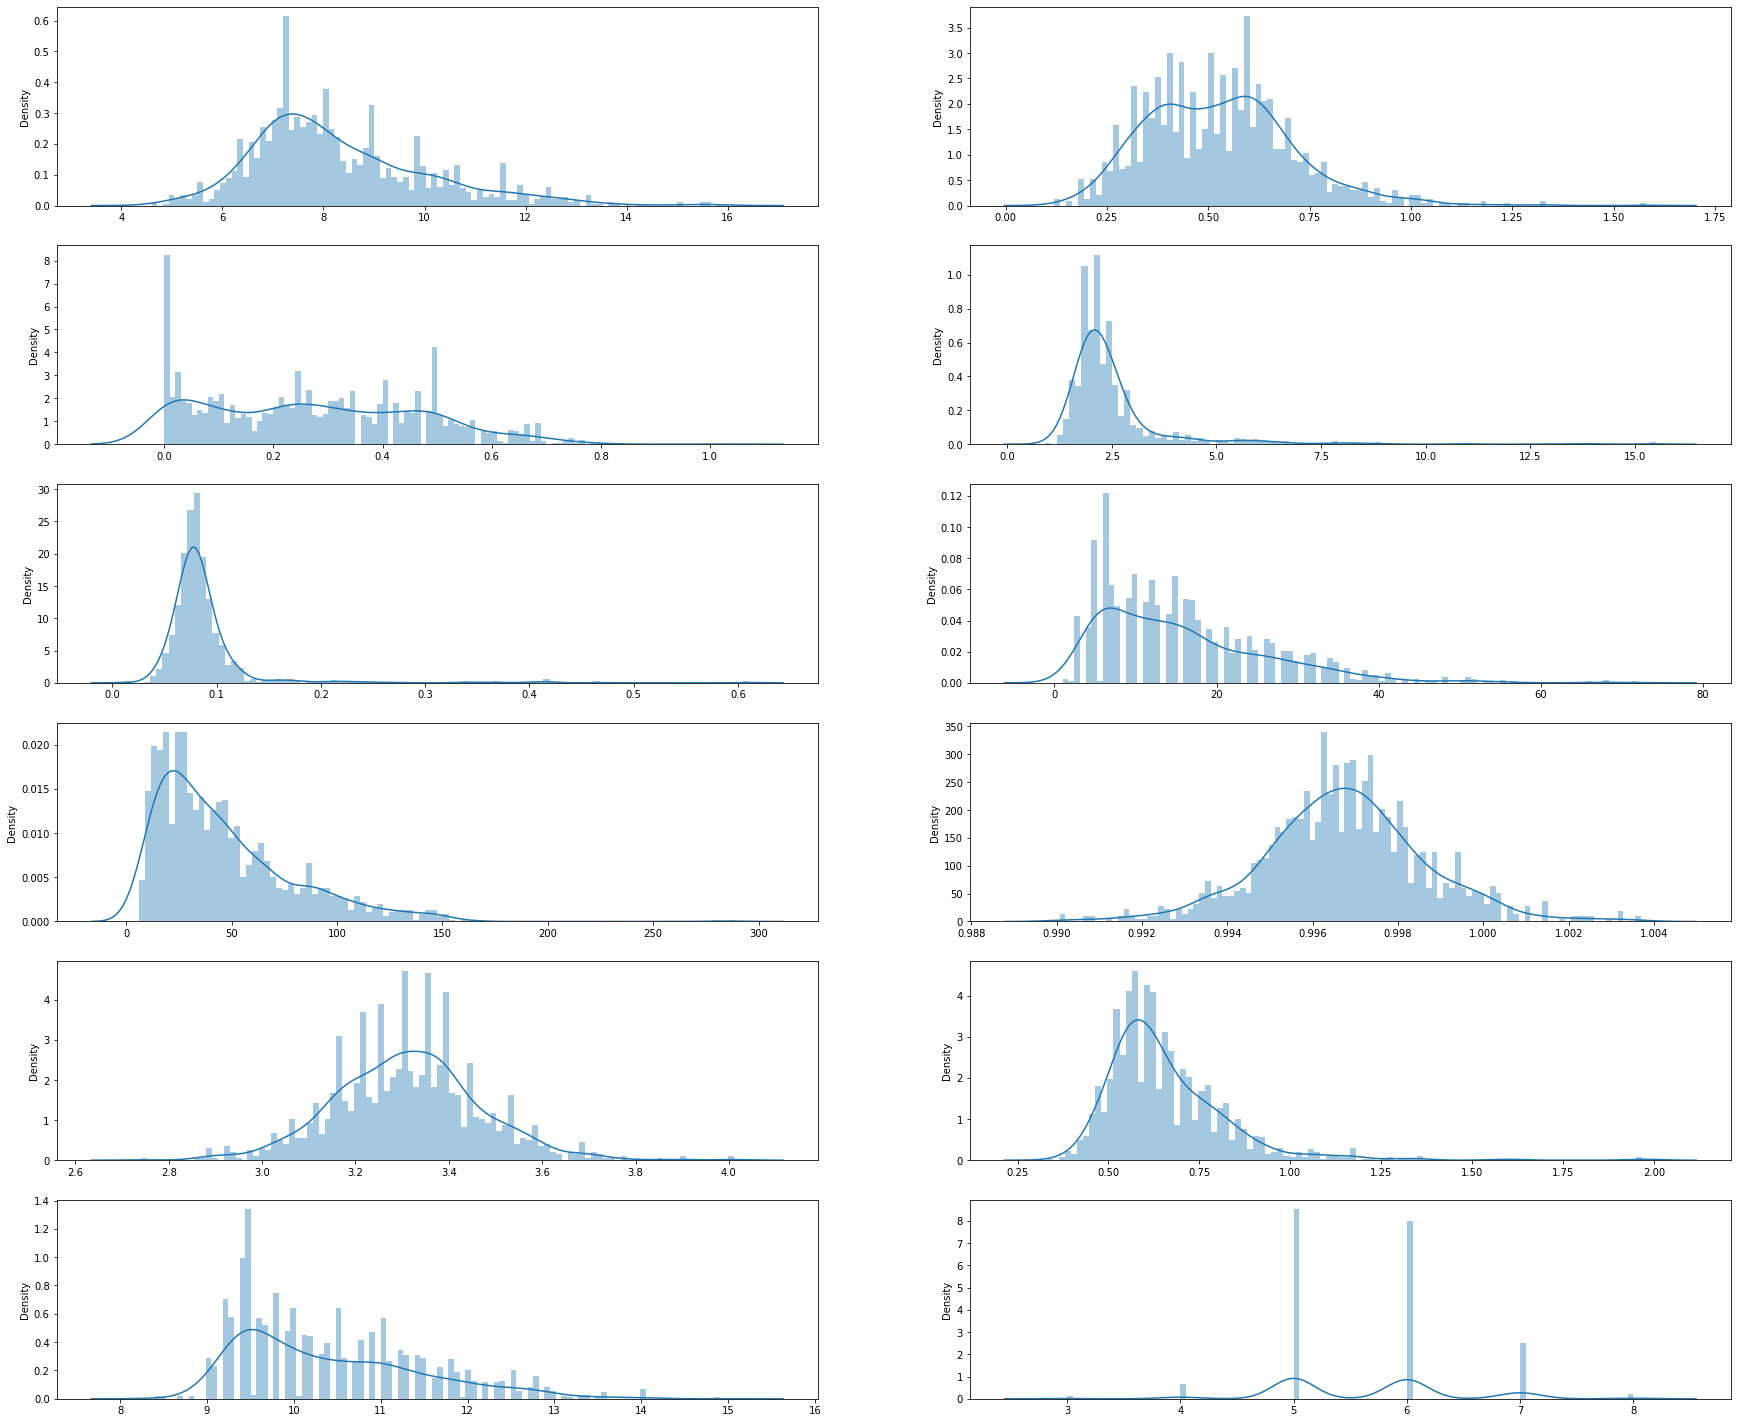

In [40]:
plt.figure(figsize=(30,30))
for i in enumerate(data.columns):
  plt.subplot(7,2,i[0]+1)
  sns.distplot(x=data[i[1]], bins = 100)

***By comparing the above 2 plots we can observe that the distribution of generated data and original data for all its variables is almost same and copulas gave better results as compared to random sampling method. *** 